# Integrante:

- Luis Felipe Poma Astete - u202110902

In [60]:
import pandas as pd # cargar y manipular datos
import sweetviz as sv # herramienta de análisis exploratória
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # procesamiento matemático
from scipy.stats import norm # normal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans


#  1. Realizar el EDA, cada paso debe contener la interpretación de los resultados.

In [61]:
df = pd.read_csv("./Hotel Reservations.csv")
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Mostrar información general del dataset

In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [63]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Visualizar datos

Datos faltantes

<Axes: >

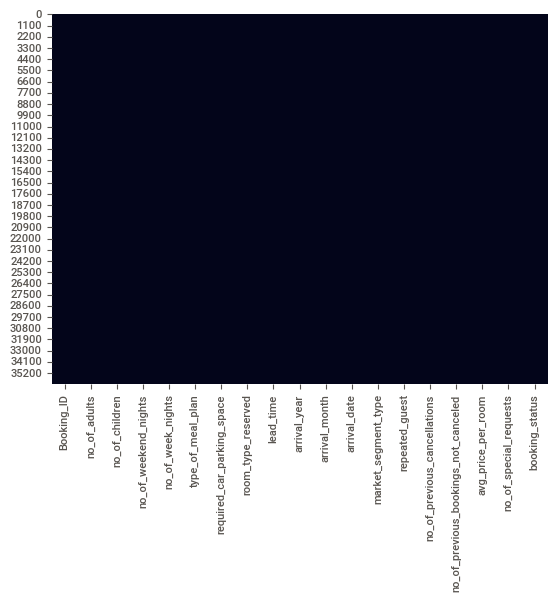

In [64]:
sns.heatmap(df.isnull(), cbar=False)

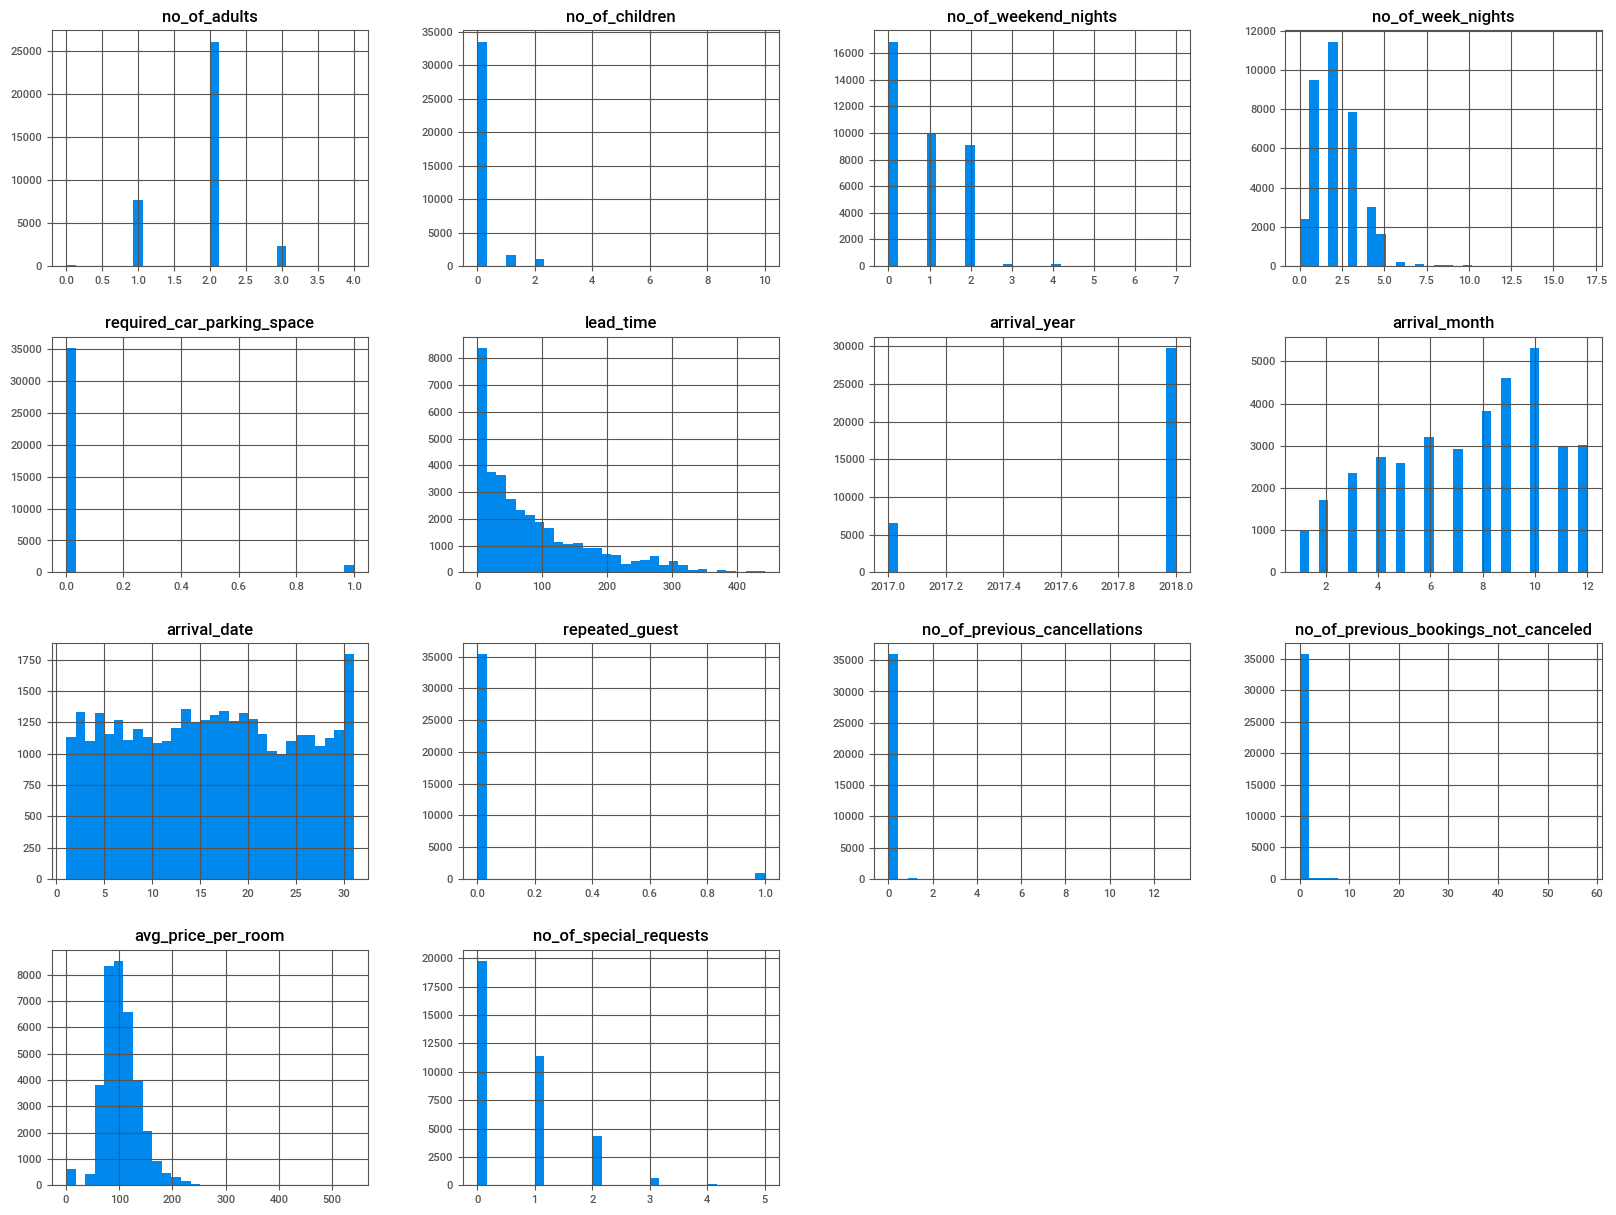

In [65]:
# Distribución de las variables numéricas
df.hist(bins=30, figsize=(20,15))
plt.show()

- **Número de adultos y niños:** Si los gráficos muestran un mayor número de adultos en comparación con niños, esto podría indicar que la mayoría de las reservas son realizadas por adultos, posiblemente para viajes de negocios o parejas sin hijos.
- **Espacio de estacionamiento requerido:** Si hay una alta demanda de espacio de estacionamiento, podría sugerir que muchos huéspedes llegan en coche, lo que puede ser relevante para la planificación de infraestructura.
- **Tiempo de espera y fechas de llegada:** Si los tiempos de espera son más largos en ciertos meses o fechas, esto podría indicar temporadas altas y bajas, ayudando a gestionar mejor el personal y los recursos durante esos periodos.
- **Porcentaje de cancelaciones previas y reservas no canceladas:** Un alto porcentaje de cancelaciones podría sugerir la necesidad de revisar las políticas de cancelación o mejorar la comunicación con los clientes para reducir la incertidumbre.
- **Precio promedio por habitación y solicitudes especiales:** Si el precio promedio por habitación es alto y hay muchas solicitudes especiales, esto podría indicar que los huéspedes están dispuestos a pagar más por servicios adicionales, lo cual es útil para estrategias de precios y marketing

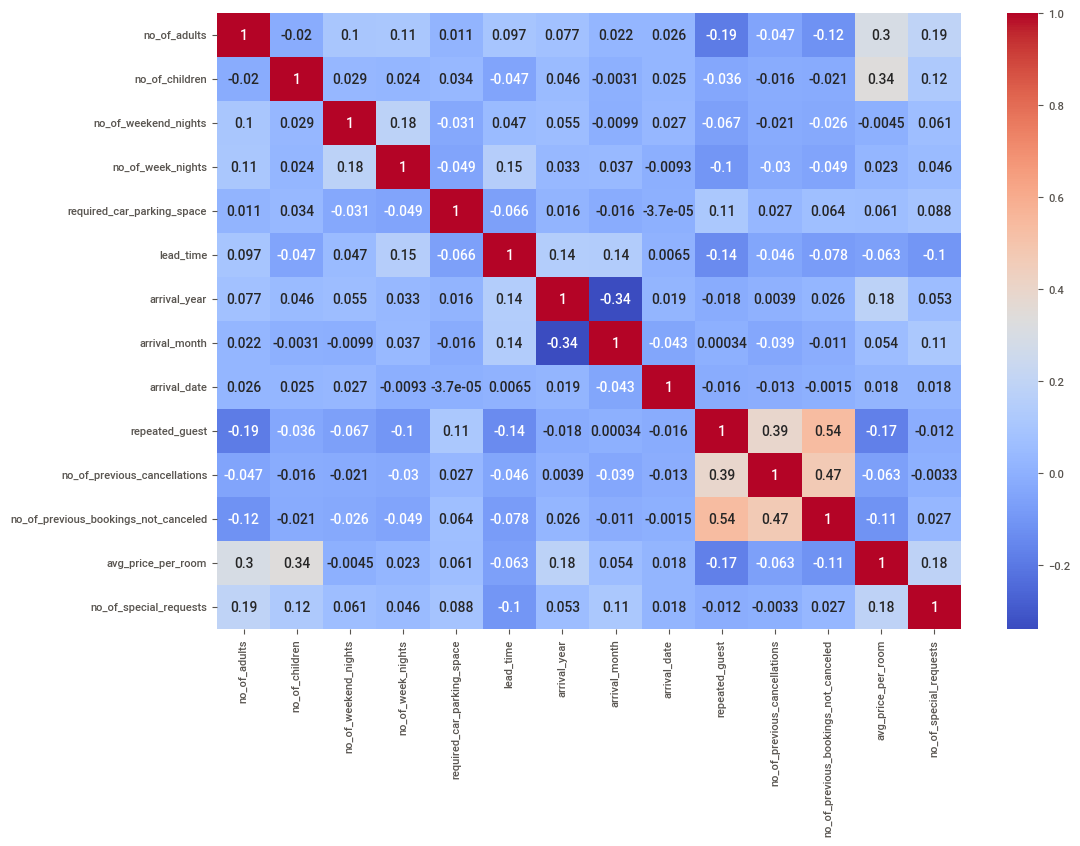

In [66]:
# Correlación de las variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

  - **Número de adultos y niños:** Existe una correlación positiva entre el número de adultos y el número de niños, lo que sugiere que las reservas con más adultos tienden a incluir más niños.
  - **Tiempo de espera (lead time):** Hay una correlación negativa entre el tiempo de espera y el número de cancelaciones previas, indicando que reservas con mayor anticipación tienen menos probabilidades de ser canceladas.
  - **Precio promedio por habitación:** El precio promedio por habitación muestra una correlación positiva con el número de solicitudes especiales, lo que sugiere que los huéspedes que pagan más también tienden a hacer más solicitudes especiales.
  - **Número de reservas no canceladas:** Existe una fuerte correlación positiva entre el número de reservas no canceladas y el número de solicitudes especiales, lo que podría indicar que los huéspedes que no cancelan sus reservas suelen tener más solicitudes especiales 

In [67]:
categorical_columns = df.select_dtypes(include=['object']).columns[1:]   

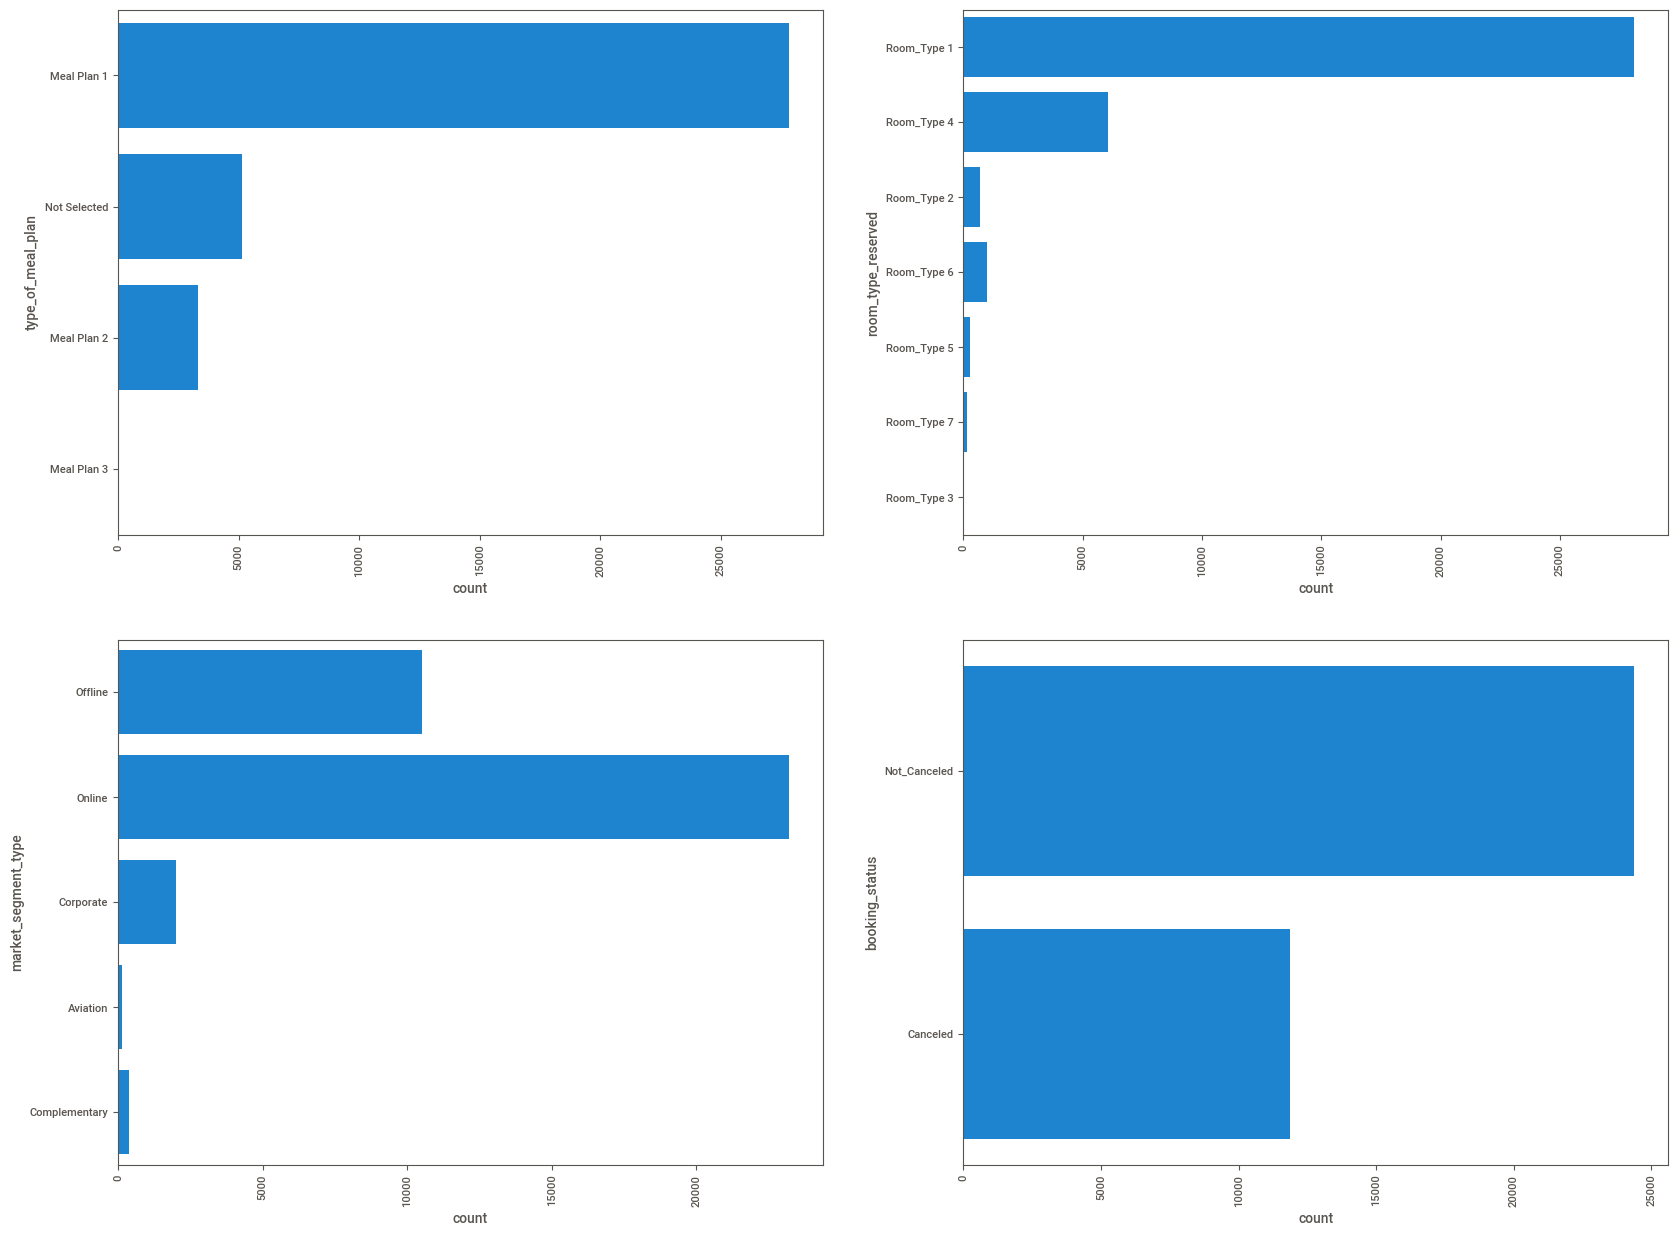

In [68]:
# visualizar categoricas en un solo plot con subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot) # type: ignore
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()


In [69]:
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

  - **Tipo de comida:** Se observa que del tipo de comida numero 3 existe solo 5 valores de este, al contrario de los demas tipos. Se podria considerar eliminar estas 5 instancias debido al ruido que pueden generar, aunque sea minimo.
  - **Segmento de mercado:** Se observa mayor segmento de parte del Online a comparacion de los demas segmentos, indicando el aumento del uso de tecnologias y redes sociales como medio de difusion.
  - **Cancelaciones:** Se puede observar que la cantidad de reservas canceladas esta cerca de la mitad de reservas no canceladas, indicando que las personas procuran no cancelar sus reservas, ya sea por costo de cancelacion o otros.
  - **Tipo de cuarto:** Se muestra una preferencia alta al cuarto de tipo 1, esto se puede deber a que es una cuarto accesible por la mayor cantidad de la clientela. Ademas, los cuartos de tipo 5, 7 y 3 son los que tienen menor frecuencia de uso.

## **Interpretacion Final**
La distribución de las variables numéricas revela varias tendencias interesantes. Por ejemplo, el número de adultos es generalmente mayor que el de niños, lo que sugiere que la mayoría de las reservas son realizadas por adultos, posiblemente para viajes de negocios o parejas sin hijos. Además, una alta demanda de espacio de estacionamiento indica que muchos huéspedes llegan en coche, lo cual es relevante para la planificación de infraestructura. Los tiempos de espera más largos en ciertos meses o fechas sugieren temporadas altas y bajas, ayudando a gestionar mejor el personal y los recursos durante esos periodos. Un alto porcentaje de cancelaciones podría indicar la necesidad de revisar las políticas de cancelación o mejorar la comunicación con los clientes para reducir la incertidumbre. Finalmente, un precio promedio por habitación alto y muchas solicitudes especiales sugieren que los huéspedes están dispuestos a pagar más por servicios adicionales, lo cual es útil para estrategias de precios y marketing.

En cuanto a la relación entre las variables numéricas, se observa una correlación positiva entre el número de adultos y el número de niños, lo que sugiere que las reservas con más adultos tienden a incluir más niños. También hay una correlación negativa entre el tiempo de espera y el número de cancelaciones previas, indicando que las reservas con mayor anticipación tienen menos probabilidades de ser canceladas. El precio promedio por habitación muestra una correlación positiva con el número de solicitudes especiales, sugiriendo que los huéspedes que pagan más también tienden a hacer más solicitudes especiales. Además, existe una fuerte correlación positiva entre el número de reservas no canceladas y el número de solicitudes especiales, lo que podría indicar que los huéspedes que no cancelan sus reservas suelen tener más solicitudes especiales.

# 2. Definir por lo menos un corte en el dataset para realizar la interpretación de los resultados, justificar la elección de la variable de corte y explicar detalladamente los resultados encontrados.

In [70]:
# Crear el reporte completo con sweetviz
report = sv.analyze(df)

# Seleccionar una variable de corte (e.g., market_segment_type)
df_cut = df[df['booking_status'] == 'Canceled'].copy()

# Generar un análisis comparativo
report_cut = sv.compare((df, "No Canceled"), (df_cut, "Canceled"))

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


In [ ]:
# Mostrar el reporte
report_cut.show_notebook()

## **Interpretacion**
- Se puede observar que mientras el tiempo de retraso sea mayor, las reservas canceladas va en aumento, indicando una relacion negativa entre estas dos variables
- Tambien se encontro que el numero de peticiones especiales es mayor cuando la persona no va a cancelar la reserva, indicando un mayor interes en la reserva y menos probabilidades de que la cancele
- Se observa mayor cantidad de cancelaciones en los meses abril, julio, agosto y noviembre. Por otro lado, se observa menor cantidad de cancelaciones a finales e inicios de año, esto puede deberse a las vacaciones.
- Se ve que las cancelaciones suelen ocurrir con mayor frecuencia en online a comparacion de otros segmentos como offline o el corporativo. Esto puede deberse a que es mucho mas facil cancelar una reserva online.
- Tambien se observa que suelen cancelarse mas cuando la reserva es de 2 o 3 personas adultas, a comparacion de cuando solo se reserva para una persona. Esto puede deberse a que al ser mas personas se incrementan las probabilidades de tener problemas de agenda o incovenientes imprevistos.

# 3. Realizar la extracción de características, extraer por lo menos una característica manual, y dos características automáticas, justificar y documentar.


## Creacion Manual

Duración total de la estadía

In [72]:
df['total_stay'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

Crear una nueva característica llamada total_nights que sume las noches de semana y las noches de fin de semana. Ayudara en la prediccion ya que nos dira cuanto tiempo esta dispuesto a quedarse, por lo que el precio de reserva sera mayor y mas complicado para la persona cancelarlo

## Creacion Automatica

In [87]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['lead_time', 'avg_price_per_room', 'no_of_special_requests']])

pca = PCA(n_components=1)
df['pca_feature'] = pca.fit_transform(scaled_data)


In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## **Justificacion**

- La característica `total_nights` permite evaluar la duración total de la estadía, lo que puede influir en las cancelaciones.
- El `pca_feature` combina múltiples variables para simplificar el análisis. Se utilizaron `lead_time`, `avg_price_per_room` y `no_of_special_requests` ya que fueron variable durante el EDA que mostraron relaciones interesantes con la variable objetivo.
- La columna `cluster` clasifica a los clientes en grupos según sus patrones de comportamiento.

## **Interpretacion**
El uso de PCA permite reducir la dimensionalidad y crear nuevas características que pueden capturar patrones ocultos en los datos.

# 4. Usar pipelines de sklearn para realizar la conversión de variables categóricas (nominales y ordinales) a numéricas y realizar el escalado correspondiente, justificar el tipo de escalado escogido.

In [75]:
for col in categorical_columns:
    print(f'{col} : {df[col].unique()}')

type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type : ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status : ['Not_Canceled' 'Canceled']


In [76]:
del df["Booking_ID"]

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir variables categóricas y numéricas
categorical_cols = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "cluster",
]
numerical_cols = [
    "lead_time",
    "total_stay",
    "avg_price_per_room",
    "no_of_special_requests",
    "pca_feature",
]

# Crear el pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(), categorical_cols),
    ]
)

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Aplicar la transformación
df_transformed = pipeline.fit_transform(df)

# Transformar a Dataframe con nombre de columnas
df_transformed = pd.DataFrame(
    df_transformed,
    columns=numerical_cols
    + list(
        pipeline.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out()
    ),
)

## **Justificacion**
- `OneHotEncoder` es apropiado para variables nominales como `type_of_meal_plan` y `market_segment_type` ya que no tienen un orden implícito.
- `StandardScaler` es adecuado para variables numéricas como `lead_time` y `avg_price_per_room`, dado que tienen diferentes escalas.

# 5. Realizar un proceso de selección de características y reducción de características de los datos. Explicar los resultados

In [80]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Separar características y etiqueta
X = df_transformed
y = df['booking_status']

# Usar RFE con RandomForest
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

# Características seleccionadas
selected_features = X.columns[rfe.support_]
print('Selected Features:', selected_features)

Selected Features: Index(['lead_time', 'total_stay', 'avg_price_per_room', 'pca_feature',
       'cluster_2'],
      dtype='object')


- `lead_time`: El tiempo entre la reserva y la llegada es crucial, ya que reservas con más tiempo de antelación pueden tener más probabilidad de cancelarse.
- `total_stay`: La duración total de la estadía (suma de noches de semana y fin de semana) también influye, ya que reservas más largas podrían tener un comportamiento distinto en términos de cancelación.
- `avg_price_per_room`: El precio promedio por habitación puede ser un determinante clave, donde tarifas más altas pueden estar asociadas con cancelaciones o reservas más seguras.
- `pca_feature`: Esta es una característica generada automáticamente que combina múltiples variables mediante PCA, capturando patrones importantes que no son evidentes en una sola variable.
- `cluster_2`: El clúster generado por K-means clasifica a los usuarios en grupos basados en patrones de comportamiento similares, y el clúster específico número 2 parece ser particularmente informativo para predecir cancelaciones.

Explained Variance by Component: [0.37438017 0.18783445 0.13550224 0.12026725 0.04853248]


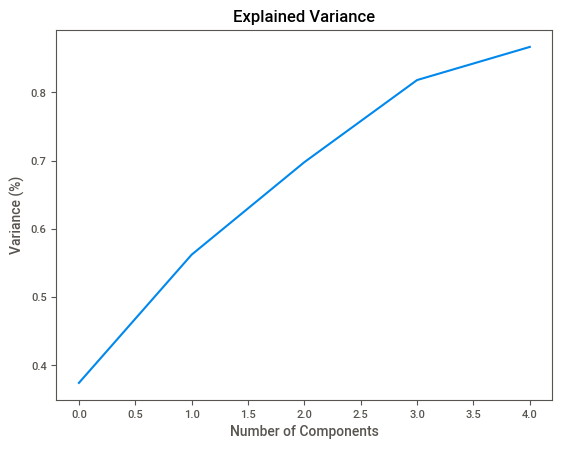

In [85]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print('Explained Variance by Component:', explained_variance)

# Graficar el codo para pca segun la varianza
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

Se puede observar en el grafico que se obtiene una varianza alta con 5 componentes:

- **Primer Componente (37.44%)**: Este componente captura la mayor parte de la varianza en los datos (37.44%). Probablemente, este componente se relacione con las características más influyentes como el lead_time y el avg_price_per_room, que pueden tener un impacto significativo en la predicción.
- **Segundo Componente (18.78%)**: Este componente agrega información adicional, tal vez asociada con la variabilidad en la duración de la estadía (total_stay) y otras características menos influyentes individualmente.
- **Tercer Componente (13.55%)**: Aunque explica menos varianza, aún añade valor al representar relaciones entre las características que los dos primeros componentes no capturan.
- **Cuarto Componente (12.03%)**: La varianza capturada sigue disminuyendo, pero aún contribuye con información que puede mejorar la comprensión del dataset.
- **Quinto Componente (4.85%)**: Este último componente captura solo una pequeña porción de la varianza, lo que sugiere que las características incluidas en este componente no son tan informativas como los primeros.

## **Interpretacion**

La combinación de RFE y PCA ha permitido seleccionar y reducir el número de características relevantes. El RFE ha seleccionado cinco características que son altamente predictivas, mientras que el PCA ha mostrado que los cinco primeros componentes explican alrededor del 87% de la varianza total en los datos, lo que indica que las transformaciones han capturado patrones importantes sin perder demasiada información. Esto te permitirá trabajar con un conjunto de datos más compacto y eficiente para futuros modelos predictivos.